## Static data point generation

Latitude: 35.424260980420215, Longitude: -114.79030709384553
Latitude: 37.49128789956872, Longitude: -109.25625575496325
Latitude: 35.452012997984134, Longitude: -114.83278914871903
Latitude: 33.94914291328831, Longitude: -115.71487452246049
Latitude: 33.79190981274627, Longitude: -117.01644079121633
Latitude: 32.16129679095732, Longitude: -105.58846197987279
Latitude: 33.20619549138558, Longitude: -104.11501932071644
Latitude: 37.60942051642635, Longitude: -108.2612958530777
Latitude: 31.21647241580106, Longitude: -104.54451387566296
Latitude: 32.17236476876749, Longitude: -105.15491377619115
Latitude: 36.875323988228764, Longitude: -114.13548283280052
Latitude: 32.6684550942756, Longitude: -105.01030378229235
Latitude: 34.8614470630954, Longitude: -114.52590156585862
Latitude: 32.21101327427292, Longitude: -104.87403098905764
Latitude: 31.346953173311146, Longitude: -118.85661928878939
Latitude: 32.46547637930482, Longitude: -106.40775970652567
Latitude: 35.61656351061468, Longitude:

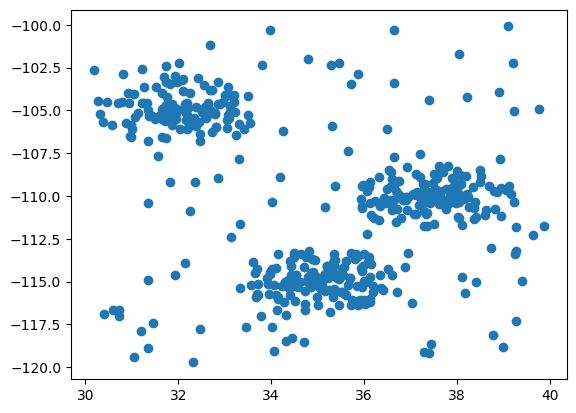

In [68]:
import random
import math


# Example usage:
min_latitude = 30.0
max_latitude = 40.0
min_longitude = -120.0
max_longitude = -100.0
max_dist = 200
crowd_fraction = 0.8
crowd_centers = [(35.0, -115.0), (37.5, -110.0), (32.0, -105.0)]  # Example crowd centers
num_points = 500



def generate_random_points(min_lat, max_lat, min_lon, max_lon, crowd_centers, n):
    data_points = []

    for _ in range(n):

        if random.random() < crowd_fraction:
            # Select a random crowd center
            center = random.choice(crowd_centers)

            # Generate a random distance and angle
            distance = random.uniform(0, max_dist)  # Adjust the maximum distance as needed
            angle = random.uniform(0, 2 * math.pi)

            # Convert distance and angle to latitude and longitude differentials
            lat_diff = distance * math.cos(angle) / 111.32  # 1 degree of latitude is approximately 111.32 km
            lon_diff = distance * math.sin(angle) / (111.32 * math.cos(center[0]))

            # Calculate the new latitude and longitude
            new_lat = center[0] + lat_diff
            new_lon = center[1] + lon_diff

            # Ensure the generated point is within the specified boundaries
            new_lat = max(min_lat, min(new_lat, max_lat))
            new_lon = max(min_lon, min(new_lon, max_lon))

        else:
            new_lat = random.uniform(min_lat, max_lat)
            new_lon = random.uniform(min_lon, max_lon)

        data_points.append((new_lat, new_lon))

    return data_points


random_points = generate_random_points(min_latitude, max_latitude, min_longitude, max_longitude, crowd_centers, num_points)

# Print the generated random points
X_s = []
Y_s = []
for point in random_points:
    print(f"Latitude: {point[0]}, Longitude: {point[1]}")
    X_s.append(point[0])
    Y_s.append(point[1])

plt.scatter(X_s, Y_s)

## Real Time movement generation

KeyboardInterrupt: 

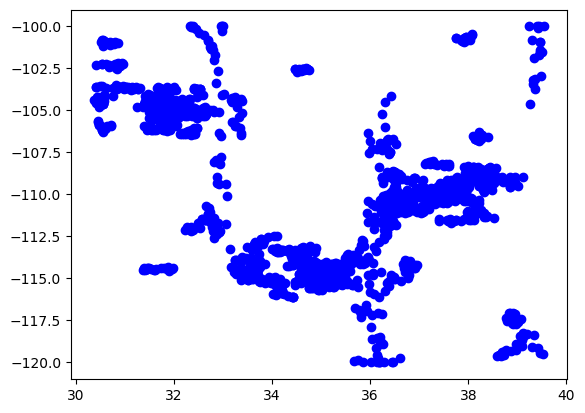

In [66]:
%matplotlib inline


import random
import math
import time
import matplotlib.pylab as plt
from IPython import display
from sys import stdout

# Example usage:
min_latitude = 30.0
max_latitude = 40.0
min_longitude = -120.0
max_longitude = -100.0
max_dist = 200
crowd_fraction = 0.8
crowd_centers = [(35.0, -115.0), (37.5, -110.0), (32.0, -105.0)]  # Example crowd centers
num_points = 100
max_move_distance=20


def get_xy_coordinates(random_points):
    X_s = []
    Y_s = []
    for point in random_points:
        # print(f"Latitude: {point[0]}, Longitude: {point[1]}")
        X_s.append(point[0])
        Y_s.append(point[1])
    return X_s, Y_s




def generate_random_points(min_lat, max_lat, min_lon, max_lon, crowd_centers, n):
    data_points = []

    for _ in range(n):
        if random.random() < crowd_fraction:
            # Select a random crowd center
            center = random.choice(crowd_centers)

            # Generate a random distance and angle
            distance = random.uniform(0, max_dist)  # Adjust the maximum distance as needed
            angle = random.uniform(0, 2 * math.pi)

            # Convert distance and angle to latitude and longitude differentials
            lat_diff = distance * math.cos(angle) / 111.32  # 1 degree of latitude is approximately 111.32 km
            lon_diff = distance * math.sin(angle) / (111.32 * math.cos(center[0]))

            # Calculate the new latitude and longitude
            new_lat = center[0] + lat_diff
            new_lon = center[1] + lon_diff

            # Ensure the generated point is within the specified boundaries
            new_lat = max(min_lat, min(new_lat, max_lat))
            new_lon = max(min_lon, min(new_lon, max_lon))

        else:
            new_lat = random.uniform(min_lat, max_lat)
            new_lon = random.uniform(min_lon, max_lon)

        data_points.append((new_lat, new_lon))

    return data_points


def move_points(data_points, max_move_distance):
    updated_points = []

    for point in data_points:
        # Generate a random distance and angle for movement
        distance = random.uniform(0, max_move_distance)
        angle = random.uniform(0, 2 * math.pi)

        # Convert distance and angle to latitude and longitude differentials for movement
        lat_diff = distance * math.cos(angle) / 111.32  # 1 degree of latitude is approximately 111.32 km
        lon_diff = distance * math.sin(angle) / (111.32 * math.cos(point[0]))

        # Update the latitude and longitude of the point
        updated_lat = point[0] + lat_diff
        updated_lon = point[1] + lon_diff

        # Ensure the updated point is within the specified boundaries
        updated_lat = max(min_latitude, min(updated_lat, max_latitude))
        updated_lon = max(min_longitude, min(updated_lon, max_longitude))

        updated_points.append((updated_lat, updated_lon))

    return updated_points


random_points = generate_random_points(
    min_latitude, max_latitude, min_longitude, max_longitude, crowd_centers, num_points
)


# fig, ax = plt.subplots() 
# Simulate movement for 10 steps
num_steps = 100
for step in range(num_steps):
    print(f"Step {step + 1}:")
    
    # Move the points
    random_points = move_points(random_points, max_move_distance)  # Adjust
    X_s, Y_s = get_xy_coordinates(random_points)
    plt.scatter(X_s, Y_s, color='b')
    display.display(plt.gcf())
    display.clear_output(wait=True)        #Uncomment this when running on jupyter notebook (not VS code)
    time.sleep(0.5)
    # display.clear_output()          #Comment this when running on jupyter notebook (not VS code)

